# Graph Learning

In [52]:
%pylab inline
import pandas as pd
import pickle as pkl

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [53]:
from mat_adj import Adj , file

In [54]:
def selfN(x,B,C):
    return -B*x + C*tanh(x)

## Dynamics in general

We know that for any graph system, the node signals follow:

$$
 \frac{d \vec{x}}{dt} = M_0(\vec{x}) + diag(M_1(\vec{x}))A M_2(\vec{x}) 
$$

Using these dynamics, it should be theoretically possible to learn back the adjacency matrix of the network that produced the signals.   

In [61]:
Dynamics = { "R1": (lambda x: -1*x , lambda x: ones(len(x)) , lambda x: x/(1+x)) , "R2":(lambda x: -(x)**(0.4) , lambda x: ones(len(x))  , lambda x: (x**(0.2)/(1 + x**(0.2)))), "P":(lambda x: - x**(0.5) , lambda x: ones(len(x))  , lambda x: x**(0.2)) , "M":(lambda x: x(1- x*x) , lambda x: x , lambda x: x/(1+x)) , "E":(lambda x: -1*x , lambda x: x**(0.5) , lambda x: x**2) , "N":(selfN , lambda x: ones(len(x))  , lambda x: tanh(x)) }

In [62]:
Type = "R1"
M0 = Dynamics[Type][0]
M1 = Dynamics[Type][1]
M2 = Dynamics[Type][2]

In [63]:
N = 21
T = 10000
A_gt = pkl.load(open(file(N),"rb"))

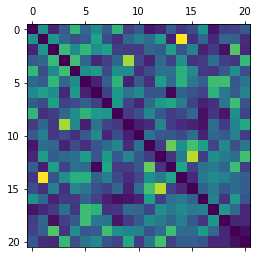

In [64]:
matshow(A_gt)

In [65]:
dt = 0.01
x0 = abs(randn(N,))
x0

array([2.95500194, 0.22315627, 0.45358707, 0.75932338, 1.13628445,
       0.83313097, 0.77850418, 0.1172801 , 0.73019713, 0.23946946,
       1.76245269, 0.35319678, 0.81450491, 0.46624949, 0.58765905,
       0.18647933, 1.11051955, 0.44574891, 0.02133807, 0.055197  ,
       0.57786794])

In [66]:
x = x0
Traj = []

for i in range(T):
    Traj.append(x)
    x = x + (M0(x) + dot(diag(M1(x)), dot(A_gt,M2(x))))*dt

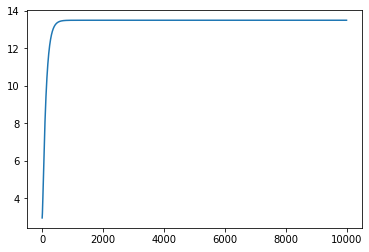

In [67]:
plot([(Traj[i])[0] for i in range(T)])

In [68]:
k = 4
samples = [Traj[k*i] for i in range(T//k)]
derivs = [(samples[i+1] - samples[i])/(k*dt) for i in range(T//k - 1)]

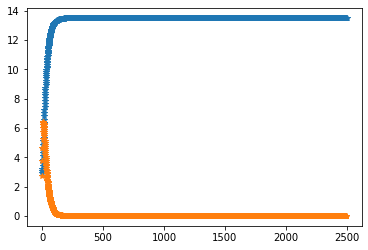

In [69]:
plot(array(samples)[:,0],"*")
plot([i for i in range(T//k - 1)], array(derivs)[:,0],"*")